In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload cats_and_dogs_filtered.zip

!unzip cats_and_dogs_filtered.zip -d /content/

base_dir = '/content/cats_and_dogs_filtered'
train_dir = base_dir + '/train'
validation_dir = base_dir + '/validation'


In [ ]:
!unzip cats_and_dogs_filtered.zip -d /content/


Archive:  cats_and_dogs_filtered.zip
replace /content/cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/cats_and_dogs_filtered/vectorize.py  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: /content/cats_and_dogs_filtered/vali

In [ ]:
base_dir = '/content/cats_and_dogs_filtered'
train_dir = base_dir + '/train'
validation_dir = base_dir + '/validation'

print("Train dir exists:", os.path.exists(train_dir))
print("Validation dir exists:", os.path.exists(validation_dir))


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.5091 - loss: 0.7224 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 2/15
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1:25 1s/step - accuracy: 0.4375 - loss: 0.6957

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 258ms/step - accuracy: 0.4375 - loss: 0.6957 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5281 - loss: 0.6902 - val_accuracy: 0.5806 - val_loss: 0.6592
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step - accuracy: 0.5625 - loss: 0.6832 - val_accuracy: 0.6099 - val_loss: 0.6587
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.5344 - loss: 0.6780 - val_accuracy: 0.5827 - val_loss: 0.6679
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - accuracy: 0.5938 - loss: 0.6874 - val_accuracy: 0.6079 - val_loss: 0.6677
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5599 - loss: 0.6708 - val_accuracy: 0.6240 - val_loss: 0.6613
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 301ms/step - accuracy: 0.6562 - loss: 0.6326 - val_accuracy: 0.5907 - val_loss: 0.6549
Epoch 9/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5695 - loss: 0.6778 - val_accuracy: 0.5766 - val_

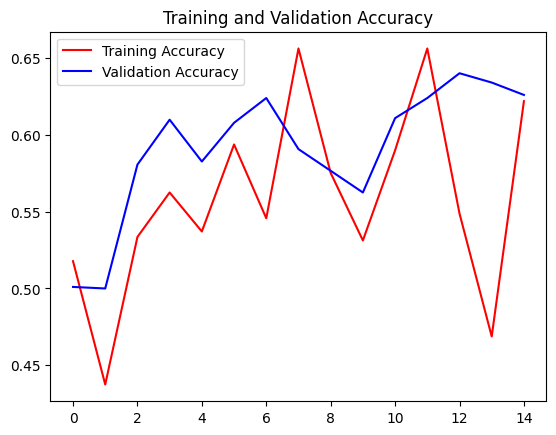

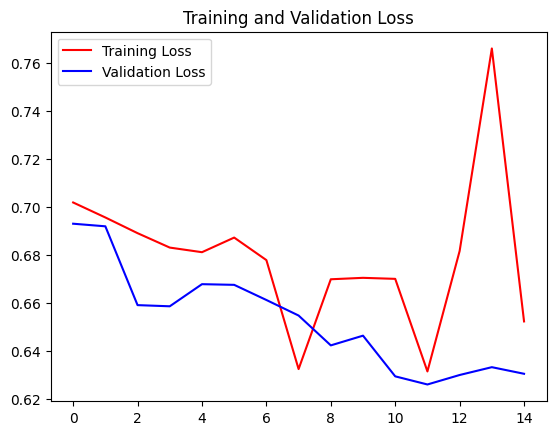

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Upload an image
uploaded = files.upload()  # Choose a cat or dog image


Saving cat.2385.jpg to cat.2385.jpg


In [ ]:
# Get uploaded image filename
img_path = list(uploaded.keys())[0]

# Load and preprocess
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Make it batch size 1
img_array /= 255.0  # Rescale


In [ ]:
# Get uploaded image filename
img_path = list(uploaded.keys())[0]

# Load and preprocess
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Make it batch size 1
img_array /= 255.0  # Rescale


In [ ]:
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: Dog 🐶")
else:
    print("Prediction: Cat 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: Dog 🐶


In [ ]:
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Upload an image
uploaded = files.upload()  # Choose a cat or dog image


Saving dog.jpg to dog.jpg


In [ ]:
prediction = model.predict(img_array)
print(prediction)  # Should be a number between 0 and 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[0.30334526]]


# Map indices to class names
class_indices = train_generator.class_indices
# Flip dictionary: {0: 'cats', 1: 'dogs'}
idx_to_class = {v: k for k, v in class_indices.items()}
print("Index to class mapping:", idx_to_class)


In [ ]:
# Map indices to class names
class_indices = train_generator.class_indices
# Flip dictionary: {0: 'cats', 1: 'dogs'}
idx_to_class = {v: k for k, v in class_indices.items()}
print("Index to class mapping:", idx_to_class)


Index to class mapping: {0: 'cats', 1: 'dogs'}


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data only rescaled
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import files

# Upload a single image
uploaded = files.upload()  # Choose a cat or dog image


Saving cat.2387.jpg to cat.2387 (1).jpg


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Get the uploaded filename
img_path = list(uploaded.keys())[0]

# Load and resize the image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Make batch size 1
img_array /= 255.0  # Rescale


In [ ]:
# Use trained model to predict
prediction = model.predict(img_array)

# Map prediction to correct label
pred_idx = 1 if prediction[0][0] > 0.5 else 0
label = idx_to_class[pred_idx]

print(f"Prediction: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Prediction: cats


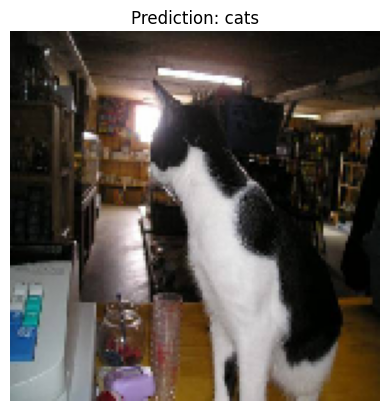

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()


In [ ]:
from google.colab import files

# Upload a single image
uploaded = files.upload()  # Choose a cat or dog image


Saving dog.2385.jpg to dog.2385.jpg


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Get the uploaded filename
img_path = list(uploaded.keys())[0]

# Load and resize the image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Make batch size 1
img_array /= 255.0  # Rescale


In [ ]:
# Use trained model to predict
prediction = model.predict(img_array)

# Map prediction to correct label
pred_idx = 1 if prediction[0][0] > 0.5 else 0
label = idx_to_class[pred_idx]

print(f"Prediction: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction: cats


In [ ]:
print(train_generator.class_indices)


{'cats': 0, 'dogs': 1}


In [ ]:
# Flip the class_indices dictionary
idx_to_class = {v: k for k, v in train_generator.class_indices.items()}
print("Index to class mapping:", idx_to_class)


Index to class mapping: {0: 'cats', 1: 'dogs'}


In [ ]:
# Evaluate model on validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 494ms/step - accuracy: 0.5002 - loss: 0.6935
Validation Accuracy: 48.40%


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=25,  # increase from 15 to 25
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)


Epoch 1/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.4790 - loss: 0.7120 - val_accuracy: 0.4980 - val_loss: 0.6919
Epoch 2/25
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1:27 1s/step - accuracy: 0.5625 - loss: 0.6880

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.5625 - loss: 0.6880 - val_accuracy: 0.4990 - val_loss: 0.6920
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4864 - loss: 0.6938 - val_accuracy: 0.5010 - val_loss: 0.6911
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 260ms/step - accuracy: 0.5000 - loss: 0.6919 - val_accuracy: 0.5020 - val_loss: 0.6908
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4823 - loss: 0.6930 - val_accuracy: 0.5020 - val_loss: 0.6869
Epoch 6/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 259ms/step - accuracy: 0.5625 - loss: 0.6784 - val_accuracy: 0.5010 - val_loss: 0.6889
Epoch 7/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.5323 - loss: 0.6832 - val_accuracy: 0.5464 - val_loss: 0.6715
Epoch 8/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step - accuracy: 0.6250 - loss: 0.6852 - val_accuracy: 0.5423 - val_loss: 0.6750
Epoch 9/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5589 - loss: 0.6793 - val_accuracy: 0.5716 - val_

In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 724ms/step - accuracy: 0.5677 - loss: 0.6687
Validation Accuracy: 56.10%


In [ ]:
# Training data with augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data
validation_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Map index to class name
class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}
print("Index to class mapping:", idx_to_class)


Index to class mapping: {0: 'cats', 1: 'dogs'}


Saving cat.2125.jpg to cat.2125.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: cat


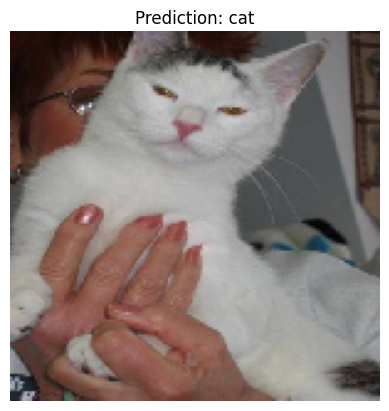

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load and preprocess
img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # rescale

# Predict
prediction = model.predict(img_array)
pred_label = 'cat' if prediction[0][0] > 0.5 else 'dog'

print(f"Prediction: {pred_label}")

# Display image
plt.imshow(img)
plt.title(f"Prediction: {pred_label}")
plt.axis('off')
plt.show()


In [ ]:
print(train_generator.class_indices)


{'cats': 0, 'dogs': 1}


In [ ]:
# Mapping from generator
idx_to_class = {v: k for k, v in train_generator.class_indices.items()}

# Predict
pred_class = int(round(prediction[0][0]))   # converts probability → 0 or 1
pred_label = idx_to_class[pred_class]

print(f"Prediction: {pred_label}")


Prediction: dogs


Saving dog.2385.jpg to dog.2385 (4).jpg
Index to class mapping: {0: 'cats', 1: 'dogs'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: dogs


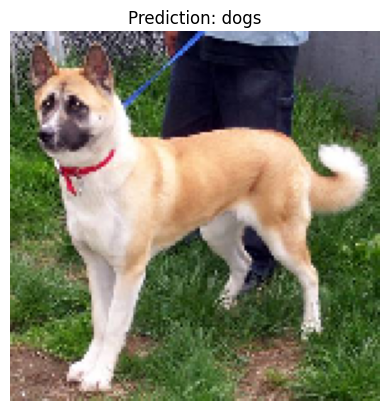

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload one image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load and preprocess
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Get class mapping from training generator
idx_to_class = {v: k for k, v in train_generator.class_indices.items()}
print("Index to class mapping:", idx_to_class)

# Predict
prediction = model.predict(img_array)
pred_class = int(round(prediction[0][0]))   # probability → 0 or 1
pred_label = idx_to_class[pred_class]

print(f"Prediction: {pred_label}")

# Display image
plt.imshow(img)
plt.title(f"Prediction: {pred_label}")
plt.axis('off')
plt.show()


In [ ]:
import os
print("Cats in train:", len(os.listdir(train_dir + '/cats')))
print("Dogs in train:", len(os.listdir(train_dir + '/dogs')))
print("Cats in validation:", len(os.listdir(validation_dir + '/cats')))
print("Dogs in validation:", len(os.listdir(validation_dir + '/dogs')))


Cats in train: 1000
Dogs in train: 1000
Cats in validation: 500
Dogs in validation: 500


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_acc*100:.2f}%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 504ms/step - accuracy: 0.5718 - loss: 0.8012
Validation accuracy: 58.60%


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.4944 - loss: 0.7088 - val_accuracy: 0.5000 - val_loss: 0.6906
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.5315 - loss: 0.6884 - val_accuracy: 0.5210 - val_loss: 0.6935
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5267 - loss: 0.6893 - val_accuracy: 0.5670 - val_loss: 0.6711
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.5711 - loss: 0.6660 - val_accuracy: 0.5880 - val_loss: 0.6571
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.5833 - loss: 0.6633 - val_accuracy: 0.5930 - val_loss: 0.6531
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.5725 - loss: 0.6740 - val_accuracy: 0.6260 - val_loss: 0.6412
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.5838 - loss: 0.6699 - val_accuracy: 0.5480 - val_loss: 0.6950
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.6083 - loss: 0.6508 - val_accuracy: 0.6410 - v

In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 506ms/step - accuracy: 0.7203 - loss: 0.5465
Validation Accuracy: 72.10%


In [ ]:
import tensorflow as tf
print("GPU Available:", tf.test.is_gpu_available())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available: False


In [ ]:
model.save("cats_vs_dogs_cnn.h5")


In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 527ms/step - accuracy: 0.7263 - loss: 0.5650
Validation Accuracy: 72.10%


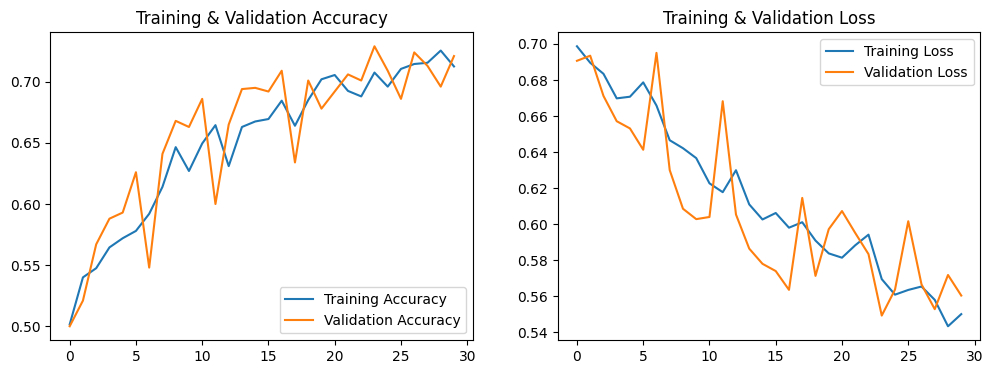

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')

plt.show()


Saving dog.2041.jpg to dog.2041.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


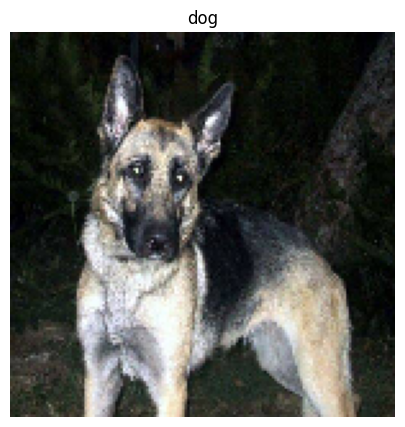

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload multiple images at once
uploaded = files.upload()
img_paths = list(uploaded.keys())

plt.figure(figsize=(15, 5))

for i, img_path in enumerate(img_paths):
    # Load & preprocess each image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict
    prediction = model.predict(img_array)
    pred_class = int(round(prediction[0][0]))
    pred_label = "cat" if pred_class == 0 else "dog"

    # Display
    plt.subplot(1, len(img_paths), i+1)
    plt.imshow(img)
    plt.title(f"{pred_label}")
    plt.axis('off')

plt.show()


In [ ]:
# Save model in Colab
model.save("cats_vs_dogs_cnn.keras")



In [ ]:
from tensorflow.keras.models import load_model

model = load_model("cats_vs_dogs_cnn.keras")


In [ ]:

model.save("/content/drive/MyDrive/cats_vs_dogs_cnn.keras")